In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
total_df = pd.DataFrame()
startup_df = pd.DataFrame()

for i in range(1,31):
    for j in range(10):
        path = f"local-test-experiments/round_{i}/peer{j}/evaluation_results/evaluation.csv"
        df = pd.read_csv(path)
        df['delta'] = 5
        df['round'] = i

        path = f"local-test-experiments/round_{i}/peer{j}/evaluation_results/startup.csv"
        start_df = pd.read_csv(path)
        # Taking the first row of the start_df to get the start_time
        start_time = start_df['start_time'].iloc[0]
        # Takimg the last row of the start_df to get the end_time
        end_time = start_df['end_time'].iloc[-1]
        # Calculatimg the elapsed time
        elapsed_time = end_time - start_time
        # Getting the port
        port = start_df['portnum'].iloc[0]
        row = pd.DataFrame({'start_time': [start_time], 'end_time': [end_time], 'elapsed_time': [elapsed_time], 'port': [port], 'round': [i]})

        total_df = pd.concat([total_df, df])
        startup_df = pd.concat([startup_df, row])


In [3]:
total_df

,start_time,end_time,delta,elapsed_time,message_size,sending,from,to,num_peers,message_type,round
0,1.721567e+09,1.721567e+09,5,0.001439,2183,False,80.57.135.211:8099,80.57.135.211:8092,0,SEND_MODEL,1
1,1.721567e+09,1.721567e+09,5,0.000130,2083,False,80.57.135.211:8097,80.57.135.211:8092,0,SEND_MODEL,1
2,1.721567e+09,1.721567e+09,5,0.000120,2027,False,80.57.135.211:8098,80.57.135.211:8092,0,SEND_MODEL,1
3,1.721567e+09,1.721567e+09,5,0.000133,105,False,80.57.135.211:8093,80.57.135.211:8092,0,AUTO_NODE_JOINED,1
4,1.721567e+09,1.721567e+09,5,0.000184,4035,False,80.57.135.211:8093,80.57.135.211:8092,1,SEND_MODEL,1
...,...,...,...,...,...,...,...,...,...,...,...
108,1.721591e+09,1.721591e+09,5,0.009727,29733,True,80.57.135.211:8101,80.57.135.211:8099,9,SEND_MODEL,30
109,1.721591e+09,1.721591e+09,5,0.010892,29767,False,80.57.135.211:8095,80.57.135.211:8101,9,SEND_MODEL,30
110,1.721591e+09,1.721591e+09,5,0.010465,29767,False,80.57.135.211:8096,80.57.135.211:8101,9,SEND_MODEL,30
111,1.721591e+09,1.721591e+09,5,0.010883,29733,True,80.57.135.211:8101,80.57.135.211:8099,9,SEND_MODEL,30


In [4]:
startup_df['start_time'] = startup_df['start_time'].astype(float)
startup_df['start_time'] = startup_df['start_time'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

startup_df['end_time'] = startup_df['end_time'].astype(float)
startup_df['end_time'] = startup_df['end_time'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

startup_df

,start_time,end_time,elapsed_time,port,round
0,2024-07-21 15:07:59,2024-07-21 15:11:17,197.873352,8092,1
0,2024-07-21 15:07:58,2024-07-21 15:11:15,196.881896,8093,1
0,2024-07-21 15:07:58,2024-07-21 15:10:46,168.043809,8094,1
0,2024-07-21 15:07:59,2024-07-21 15:10:45,166.654140,8095,1
0,2024-07-21 15:07:57,2024-07-21 15:10:46,169.053189,8096,1
...,...,...,...,...,...
0,2024-07-21 21:28:38,2024-07-21 21:31:27,168.682475,8097,30
0,2024-07-21 21:28:37,2024-07-21 21:31:24,167.278310,8098,30
0,2024-07-21 21:28:37,2024-07-21 21:31:24,167.056956,8099,30
0,2024-07-21 21:28:40,2024-07-21 21:30:58,138.250694,8100,30


C:\Users\damla\AppData\Local\Temp\ipykernel_20748\4122265580.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors)
C:\Users\damla\AppData\Local\Temp\ipykernel_20748\4122265580.py:7: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors)


<Axes: title={'center': 'Startup Time for Each Peer'}, xlabel='Port Number', ylabel='Elapsed Time [s]'>

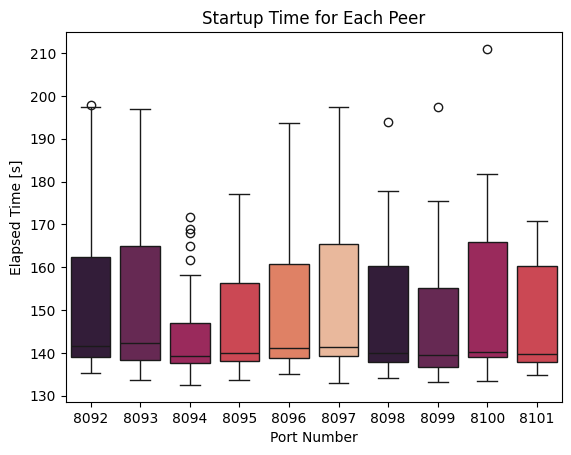

In [5]:
colors = sns.color_palette('rocket')[0:10]

plt.xlabel('Port Number')
plt.ylabel('Elapsed Time [s]')
plt.title('Startup Time for Each Peer')

sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors)

C:\Users\damla\AppData\Local\Temp\ipykernel_20748\4210319916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])
C:\Users\damla\AppData\Local\Temp\ipykernel_20748\4210319916.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors)
C:\Users\damla\AppData\Local\Temp\ipykernel_20748\4210319916.py:7: UserWarning: 
The palette list 

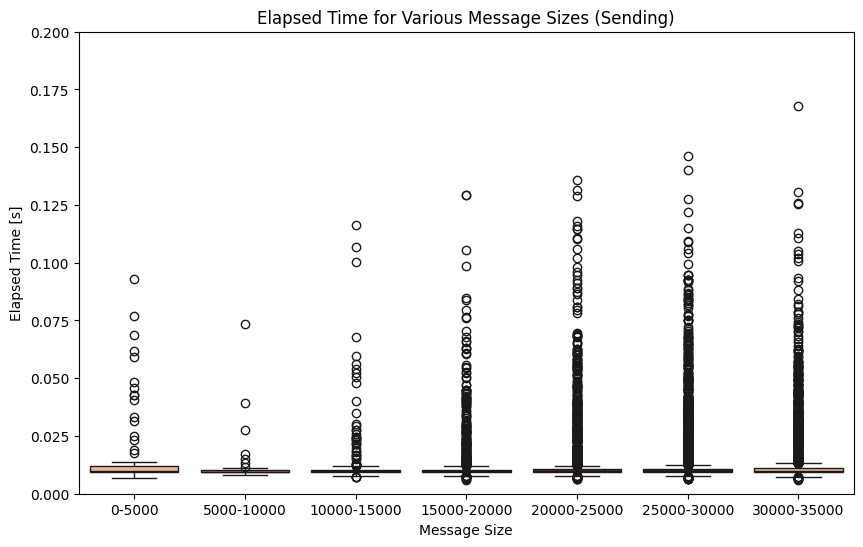

In [6]:
plt.figure(figsize=(10,6))
colors = sns.color_palette('rocket_r')

temp = total_df[(total_df['num_peers'] == 9) & (total_df['message_type'] == 'SEND_MODEL') & (total_df['sending'] == True)]
temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])

sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors)

plt.ylim(0, 0.2)

plt.xlabel('Message Size')
plt.ylabel('Elapsed Time [s]')
plt.title('Elapsed Time for Various Message Sizes (Sending)')

plt.show()

C:\Users\damla\AppData\Local\Temp\ipykernel_20748\1865173131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])
C:\Users\damla\AppData\Local\Temp\ipykernel_20748\1865173131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors)
C:\Users\damla\AppData\Local\Temp\ipykernel_20748\1865173131.py:6: UserWarning: 
The palette list 

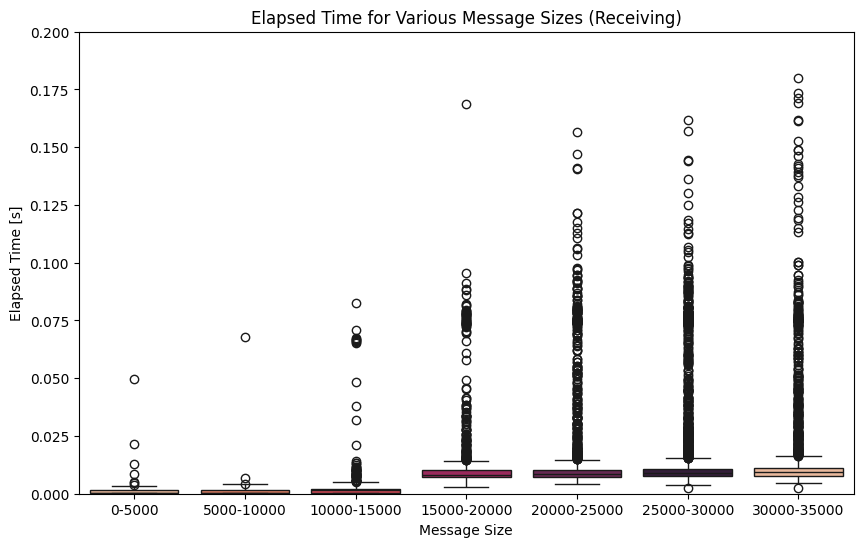

In [7]:
plt.figure(figsize=(10,6))

temp = total_df[(total_df['num_peers'] == 9) & (total_df['message_type'] == 'SEND_MODEL') & (total_df['sending'] == False)]
temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])

sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors)

plt.ylim(0, 0.2)

plt.xlabel('Message Size')
plt.ylabel('Elapsed Time [s]')
plt.title('Elapsed Time for Various Message Sizes (Receiving)')

plt.show()

C:\Users\damla\AppData\Local\Temp\ipykernel_20748\566024231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sending", y="message_size", data=sent_data, ax=ax, palette="rocket", width=0.5)


Text(0.5, 1.0, 'Message Size Distribution')

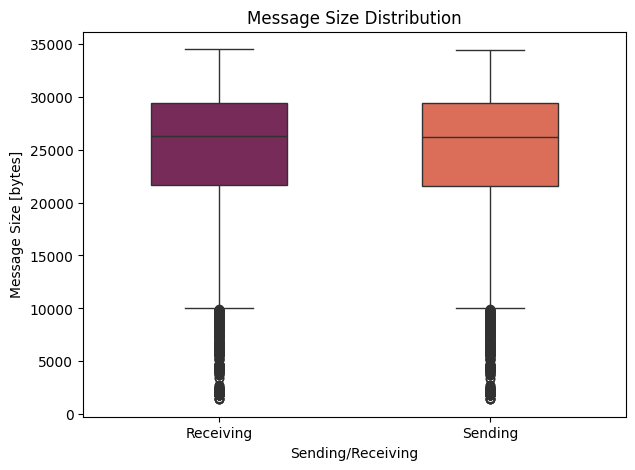

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))

sent_data = total_df[total_df["message_type"] == "SEND_MODEL"]

sns.boxplot(x="sending", y="message_size", data=sent_data, ax=ax, palette="rocket", width=0.5)

plt.xticks(ticks=[True, False], labels=["Sending", "Receiving"])
plt.xlabel('Sending/Receiving')
plt.ylabel('Message Size [bytes]')
plt.title('Message Size Distribution')

C:\Users\damla\AppData\Local\Temp\ipykernel_20748\1862812643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cumulative_elapsed_time'] = temp['start_time'].diff().fillna(0).cumsum()
C:\Users\damla\AppData\Local\Temp\ipykernel_20748\1862812643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cumulative_elapsed_time'] = temp['start_time'].diff().fillna(0).cumsum()
C:\Users\damla\AppData\Local\Temp\ipykernel_20748\1862812643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

Text(0.5, 1.0, 'Message Size Over Time')

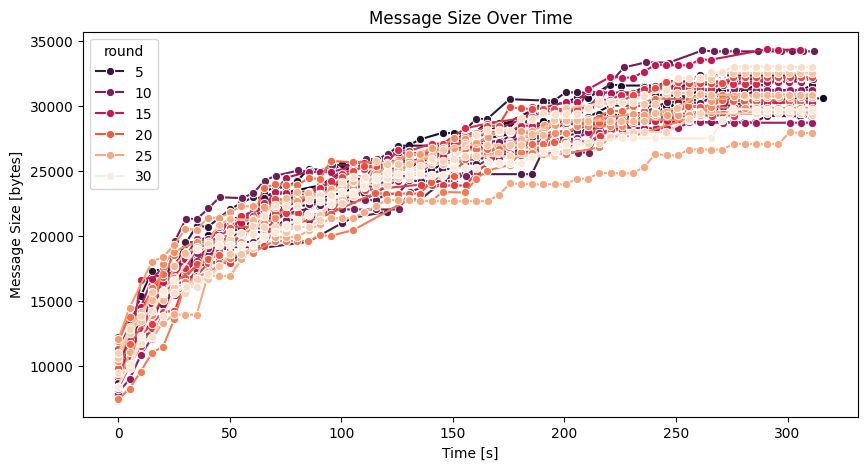

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

sent_data = total_df[(total_df["message_type"] == "SEND_MODEL") & (total_df["sending"] == True) & (total_df["num_peers"] == 9) & (total_df["from"] == "80.57.135.211:8092")]

temp_df = pd.DataFrame()

for i in range(1, 31):
    temp = sent_data[sent_data['round'] == i]
    temp['cumulative_elapsed_time'] = temp['start_time'].diff().fillna(0).cumsum()
    temp_df = pd.concat([temp_df, temp])

sns.lineplot(x="cumulative_elapsed_time", y="message_size", data=temp_df, hue="round", ax=ax, marker="o", palette="rocket")

plt.xlabel('Time [s]')
plt.ylabel('Message Size [bytes]')
plt.title('Message Size Over Time')


C:\Users\damla\AppData\Local\Temp\ipykernel_20748\3258066288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="elapsed_time", data=auto_join, ax=ax, palette="rocket")


Text(0.5, 1.0, 'Elapsed Time for Auto Node Join')

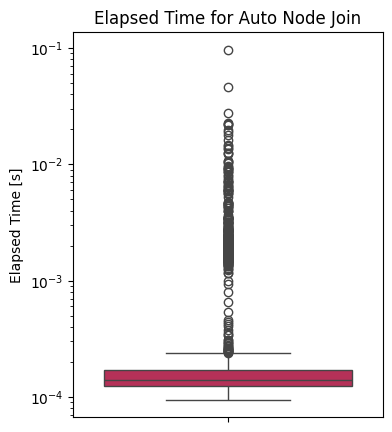

In [10]:
auto_join = total_df[(total_df["message_type"] == "AUTO_NODE_JOINED")]

fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(y="elapsed_time", data=auto_join, ax=ax, palette="rocket")

ax.set_yscale("log")

plt.ylabel('Elapsed Time [s]')
plt.title('Elapsed Time for Auto Node Join')